# LANL Earthquake Prediction - predict upcoming laboratory earthquakes

# Introduction:

Forecasting earthquakes is one of the most important problems in Earth science because of their devastating consequences. Current scientific studies related to earthquake forecasting focus on three key points: when the event will occur, where it will occur, and how large it will be.  

Scientists can predict where an earthquake might occur, but predicting when it will occur and how strong it will be has been an intractable challenge.In this notebook, we will address when the earthquake will take place. Specifically, you’ll predict the time remaining before laboratory earthquakes occur from real-time seismic data that will have the potential to improve earthquake hazard assessments that could save lives and billions of dollars in infrastructure.

# Data:

An earthquake occurs when massive blocks of Earth, often near the interface between tectonic plates, suddenly slip along fractures in the earth, or faults. The same stress that holds the rock in place under pressure—friction—builds up to a point that the rocks slip past one another rapidly and forcefully, releasing energy via seismic waves.

In the lab, Los Alamos National Laboratory researchers imitated a real earthquake using steel blocks interacting with rocky material (fault gauge) to induce slipping that emitted seismic sounds. The seismic data (acoustic data) is recorded using a piezoceramic sensor, which outputs a voltage upon deformation by incoming seismic waves. The seismic data of the input is this recorded voltage, in integers.The team acknowledges that the physical traits of the lab experiment (such as shear stresses and thermal properties) differ from the real world.

The seismic data is recorded in bins of 4096 samples.Each bin(input) is a chunk of 0.0375 seconds of seismic data (ordered in time), which is recorded at 4MHz, hence 150,000 data points, and the output is time remaining until the following lab earthquake in seconds,but there is a 12 microseconds gap between each bin, an artifact of the recording device.Both the training and the testing set come from the same experiment. There is no overlap between the training and testing sets, that are continuous in time.

# Business problem:

The goal of the challenge is to capture the physical state of the laboratory fault and how close it is from failure from a snapshot of the seismic data it is emitting. We will have to build a model that predicts the time remaining before failure from a chunk of seismic data.

# Understanding data Folders:  

* train.csv - A single, continuous training segment of experimental data.File is of about 2.03 GB containing 629145480 rows of data.Each row indicates amplitude of the oscillation and its corresponding time to failure.
* test - A folder containing many small segments of test data.Files is about 242MB.It consists of 2624 csv files.Each file consists of about 150000 rows called segment.
* sample_sumbission.csv - A sample submission file in the correct format.This sample submission files consists of test data seg_id and its corresponding time_to_failure.For each seg_id in the test folder, you should predict a single time_to_failure corresponding to the time between the last row of the segment and the next laboratory earthquake.

# Features:

* acoustic_data - the seismic signal [int16]
* time_to_failure - the time (in seconds) until the next laboratory earthquake [float64]
* seg_id - the test segment ids for which predictions should be made (one prediction per segment)

# Machine Learning Problem:

This is a regression problem which predicts time_to_failure.  
MAE is used as a performance metric.

# Load Modules

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download data From kaggle

In [0]:
pip install kaggle

In [0]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"snehasathish","key":"b72b4c47e42ce8bf94a6f214142dfb59"}'}

In [0]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c LANL-Earthquake-Prediction

sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip train.csv.zip

# Load Train Data

In [0]:
signal = pd.read_csv('train.csv', dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})

In [0]:
signal.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


# Exploratory Data Analysis

In [0]:
#Data Types of given signal

signal.dtypes

acoustic_data        int16
time_to_failure    float64
dtype: object

In [0]:
# Statistical Analysis of data

signal.describe()

,acoustic_data,time_to_failure
count,6.000000e+06,6.000000e+06
mean,4.545660e+00,1.350958e+00
std,2.277303e+01,2.533610e+00
min,-4.621000e+03,7.954798e-04
25%,2.000000e+00,3.902964e-01
50%,5.000000e+00,7.796974e-01
75%,7.000000e+00,1.169098e+00
max,3.252000e+03,1.154080e+01


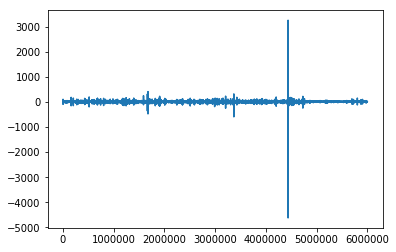

In [0]:
# Plot Acoustic data

plt.plot(signal['acoustic_data'].values)
plt.show()

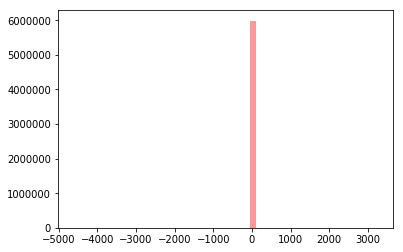

In [0]:
# Distribution of acoustic data

sns.distplot(train.acoustic_data.values, color="Red", kde=False)
plt.show()

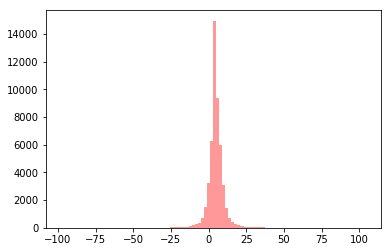

In [0]:
# Distribution of small part of acoustic data

sns.distplot(train.acoustic_data.values[0:50000], color="Red", bins=100, kde=False)
plt.show()

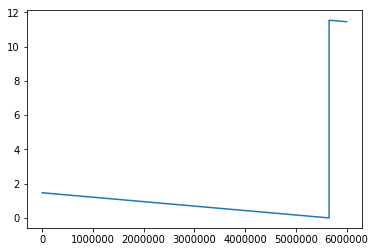

In [0]:
# plot time to failure

plt.plot(signal['time_to_failure'].values)
plt.show()

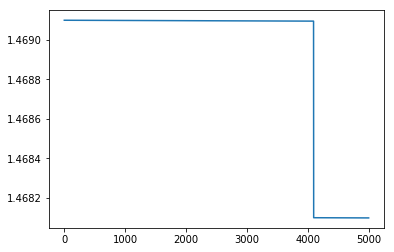

In [0]:
# Plotting first 5000 values of time_to_failure

plt.plot(signal['time_to_failure'].values[0:5000])
plt.show()

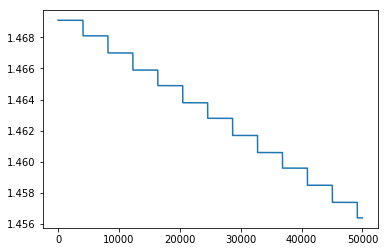

In [0]:
# Plotting first 50000 values of time_to_failure

plt.plot(signal['time_to_failure'].values[0:50000])
plt.show()

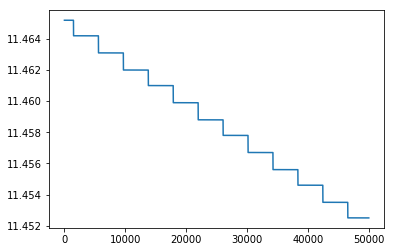

In [0]:
# Plotting in-between 5000 values of time_to_failure

plt.plot(signal['time_to_failure'].values[5950000:6500000])
plt.show()

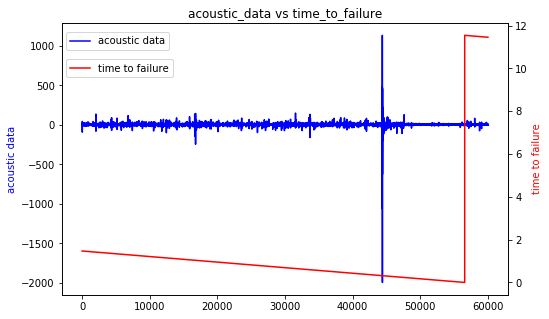

In [0]:
# Acoustic-data vs time-to-failure

fig, ax1 = plt.subplots(figsize=(8,5))
plt.title('acoustic_data vs time_to_failure')
plt.plot(signal['acoustic_data'].values[::100], color='b')
ax1.set_ylabel('acoustic data', color='b')
plt.legend(['acoustic data'], loc=(0.01, 0.9))
ax2 = ax1.twinx()
plt.plot(signal['time_to_failure'].values[::100], color='r')
ax2.set_ylabel('time to failure', color='r')
plt.legend(['time to failure'], loc=(0.01, 0.8))
plt.show()

** Summary: **

1. Features:  
   acoustic_data    :    int16  
  time_to_failure    :    float64  
2. There is a large difference between mean of the data or 50% data to max value present in acoustic data indicating that there is a large seismic data that shifts data towards right.
3. When plotting the whole acoustic data,only one peak is merely visible.This is because of the highest peak present in acoustic data.Later zooming into only 50000 data we see a nice plot close enogh to a guassian distibuted plot.
4. When plotting time_to_failure,we could see that it gradually decreases and some point there is a high peak indicating there is high chances of occurence of earthquake.Zooming into few data we could see that there is a gradual step size decrease of time left enough for the occurence of earthquake.
5. It could be seen that failure does not ocuur right after the having higher oscillations.There are small oscillations that occur btween the last larger oscillation and time of failure.We could also see that right after time to failure tends to zero,it gradually increases indicating that there is lot of time remaining for the next larger oscillation
